In [36]:
import torch
import numpy as np
import gensim
from utils import GRU, LSTM, evaluate, get_embedding_matrix, CustomDataset, plot_learning_curve
from sklearn.preprocessing import LabelEncoder
import pickle as pkl
import json
import matplotlib.pyplot as plt
global fasttext
fasttext = None


In [39]:
def get_emb(embedding):
    global fasttext
    if embedding == "word2vec":
        model = "Embeddings/GoogleNews-vectors-negative300.bin.gz"
        embedding_model = gensim.models.KeyedVectors.load_word2vec_format(model, binary=True)
    elif embedding == "glove":
        model = "Embeddings/glove.42B.300d.bin.gz"
        embedding_model = gensim.models.KeyedVectors.load_word2vec_format(model, binary=True)
    else:
        if fasttext is None:
            model = "Embeddings/cc.en.300.bin.gz"
            fasttext = model
            embedding_model = gensim.models.fasttext.load_facebook_model(model).wv
            fasttext = embedding_model
        else:
            embedding_model = fasttext
    return embedding_model

In [13]:
def load_model(task: int, model_num: int, emb_model,emb_name: str):
    filename = f"Models/t{task}_model{model_num}_{emb_name}.pt"
    models = {2: LSTM, 3: GRU}
    emb_matrix = get_embedding_matrix(emb_model)
    model = models[model_num](input_size = 300, hidden_size = 128, output_size = 27 if task == 1 else 3,
                        embedding_matrix = emb_matrix, num_layers = 2)
    model.load_state_dict(torch.load(filename))
    model.eval()
    return model

def get_label_encoder(task: int):
    dataset = 'ATE' if task == 2 else 'NER'
    filename = f'Datasets/preprocessed/{dataset}/{dataset}_train.json'
    json_file = json.load(open(filename))
    labels = set()
    for data in json_file.values():
        labels.update(data["labels"])
    encoder = LabelEncoder()
    encoder.fit(sorted(labels))
    return encoder

def get_data(task: int,emb_name):
    dataset = 'ATE' if task == 2 else 'NER'
    filename = f'Datasets/preprocessed/{dataset}/{dataset}_test.json'
    json_file = json.load(open(filename))
    data = [],[]
    for entry in json_file.values():
        data[0].append(entry["text"].split())
        data[1].append(entry["labels"])
    dataset = CustomDataset(data[0], data[1],get_label_encoder(task),get_emb(emb_name))
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=128, shuffle=False)
    return dataloader,dataset

# Task 1 LSTM (Model 2) Word2Vec

In [16]:
test_loader, test_set = get_data(1,'word2vec')
model = load_model(1,2,test_set.embedding,'word2vec')
results = evaluate(model, test_loader, torch.nn.NLLLoss(), CRF=False)

Test Loss: 0.14693
Accuracy: 0.92240, Precision: 0.64729, Recall: 0.53364, F1-Score: 0.57305


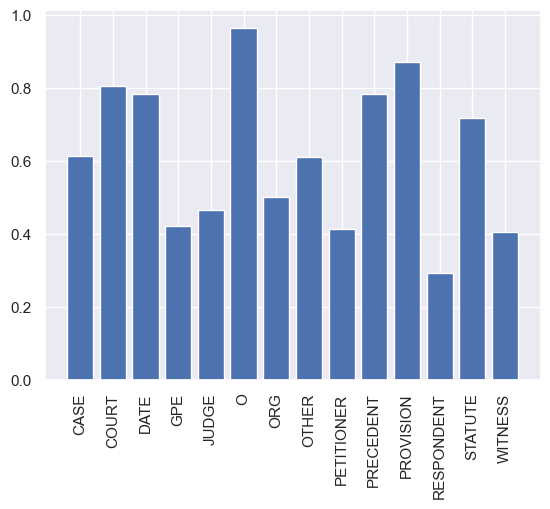

In [26]:
plt.bar(range(len(results['class_wise_f1:'])),results['class_wise_f1:'].values())
plt.xticks(range(len(results['class_wise_f1:'])), results['class_wise_f1:'].keys(), rotation=90)
plt.show()

# Task 1 LSTM (Model 2) Glove

In [27]:
test_loader, test_set = get_data(1,'glove')
model = load_model(1,2,test_set.embedding,'glove')
results = evaluate(model, test_loader, torch.nn.NLLLoss(), CRF=False)

c:\Users\Divyajeet Singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Loss: 0.19173
Accuracy: 0.89501, Precision: 0.39536, Recall: 0.29044, F1-Score: 0.31579


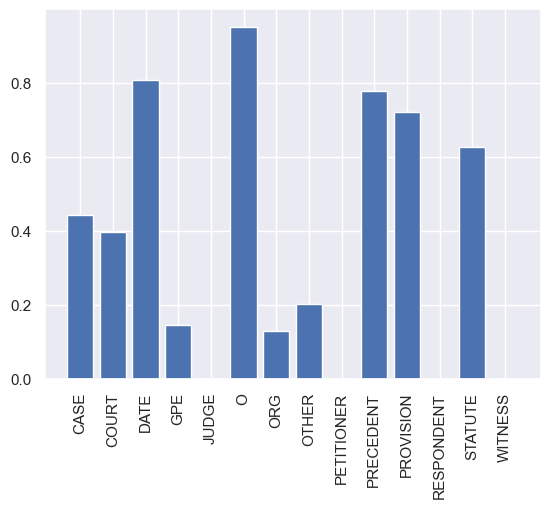

In [28]:
plt.bar(range(len(results['class_wise_f1:'])),results['class_wise_f1:'].values())
plt.xticks(range(len(results['class_wise_f1:'])), results['class_wise_f1:'].keys(), rotation=90)
plt.show()

# Task 1 LSTM (Model 2) FastText

In [29]:
test_loader, test_set = get_data(1,'fasttext')
model = load_model(1,2,test_set.embedding,'fasttext')
results = evaluate(model, test_loader, torch.nn.NLLLoss(), CRF=False)

Test Loss: 0.11625
Accuracy: 0.93701, Precision: 0.62846, Recall: 0.53249, F1-Score: 0.56043


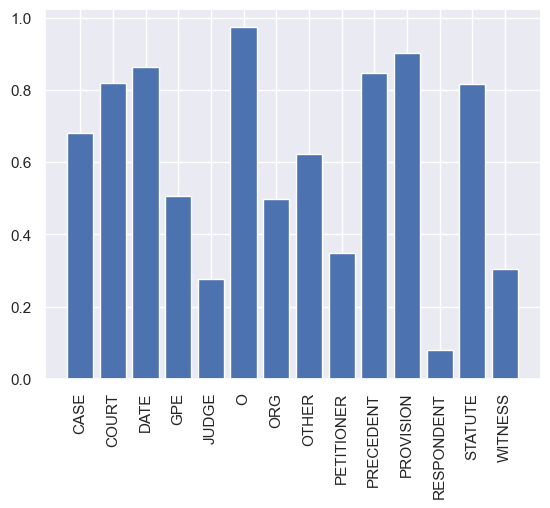

In [30]:
plt.bar(range(len(results['class_wise_f1:'])),results['class_wise_f1:'].values())
plt.xticks(range(len(results['class_wise_f1:'])), results['class_wise_f1:'].keys(), rotation=90)
plt.show()

# Task 1 GRU (Model 3) Word2Vec

In [31]:
test_loader, test_set = get_data(1,'word2vec')
model = load_model(1,3,test_set.embedding,'word2vec')
results = evaluate(model, test_loader, torch.nn.NLLLoss(), CRF=False)

Test Loss: 0.13318
Accuracy: 0.92646, Precision: 0.65188, Recall: 0.55723, F1-Score: 0.59208


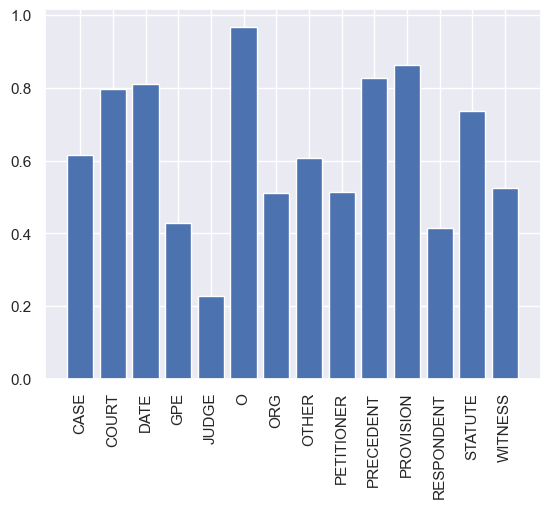

In [32]:
plt.bar(range(len(results['class_wise_f1:'])),results['class_wise_f1:'].values())
plt.xticks(range(len(results['class_wise_f1:'])), results['class_wise_f1:'].keys(), rotation=90)
plt.show()

# Task 1 GRU (Model 3) Glove

In [33]:
test_loader, test_set = get_data(1,'glove')
model = load_model(1,3,test_set.embedding,'glove')
results = evaluate(model, test_loader, torch.nn.NLLLoss(), CRF=False)

c:\Users\Divyajeet Singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Loss: 0.19017
Accuracy: 0.89546, Precision: 0.46427, Recall: 0.34836, F1-Score: 0.37005


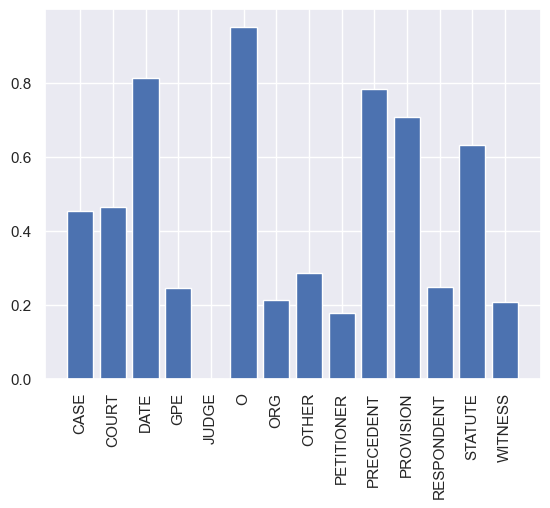

In [34]:
plt.bar(range(len(results['class_wise_f1:'])),results['class_wise_f1:'].values())
plt.xticks(range(len(results['class_wise_f1:'])), results['class_wise_f1:'].keys(), rotation=90)
plt.show()

# Task 1 GRU (Model 3) FastText

In [40]:
test_loader, test_set = get_data(1,'fasttext')
model = load_model(1,3,test_set.embedding,'fasttext')
results = evaluate(model, test_loader, torch.nn.NLLLoss(), CRF=False)

c:\Users\Divyajeet Singh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Test Loss: 0.11627
Accuracy: 0.93605, Precision: 0.60876, Recall: 0.54332, F1-Score: 0.56720


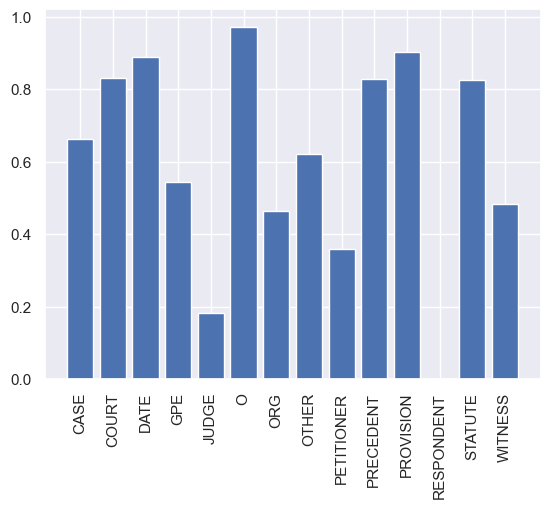

In [41]:
plt.bar(range(len(results['class_wise_f1:'])),results['class_wise_f1:'].values())
plt.xticks(range(len(results['class_wise_f1:'])), results['class_wise_f1:'].keys(), rotation=90)
plt.show()

# Task 2 LSTM (Model 2) Word2Vec

In [42]:
test_loader, test_set = get_data(2,'word2vec')
model = load_model(2,2,test_set.embedding,'word2vec')
results = evaluate(model, test_loader, torch.nn.NLLLoss(), CRF=False)

Test Loss: 0.05105
Accuracy: 0.93057, Precision: 0.80758, Recall: 0.78163, F1-Score: 0.79397


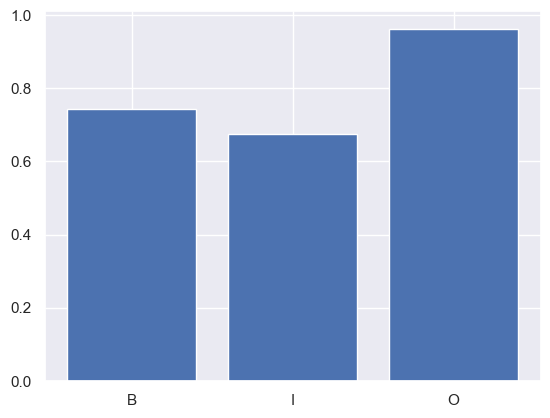

In [44]:
plt.bar(range(len(results['class_wise_f1:'])),results['class_wise_f1:'].values())
plt.xticks(range(len(results['class_wise_f1:'])), results['class_wise_f1:'].keys())
plt.show()

# Task 2 LSTM (Model 2) Glove

In [45]:
test_loader, test_set = get_data(2,'glove')
model = load_model(2,2,test_set.embedding,'glove')
results = evaluate(model, test_loader, torch.nn.NLLLoss(), CRF=False)

Test Loss: 0.05524
Accuracy: 0.91597, Precision: 0.82419, Recall: 0.67716, F1-Score: 0.73499


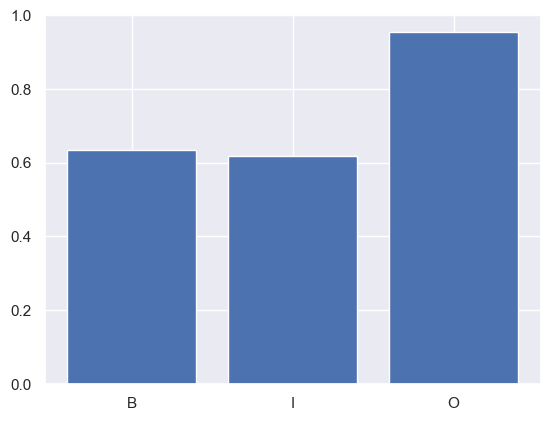

In [46]:
plt.bar(range(len(results['class_wise_f1:'])),results['class_wise_f1:'].values())
plt.xticks(range(len(results['class_wise_f1:'])), results['class_wise_f1:'].keys())
plt.show()

# Task 2 LSTM (Model 2) FastText

In [47]:
test_loader, test_set = get_data(2,'fasttext')
model = load_model(2,2,test_set.embedding,'fasttext')
results = evaluate(model, test_loader, torch.nn.NLLLoss(), CRF=False)

Test Loss: 0.04510
Accuracy: 0.93154, Precision: 0.82797, Recall: 0.77787, F1-Score: 0.79962


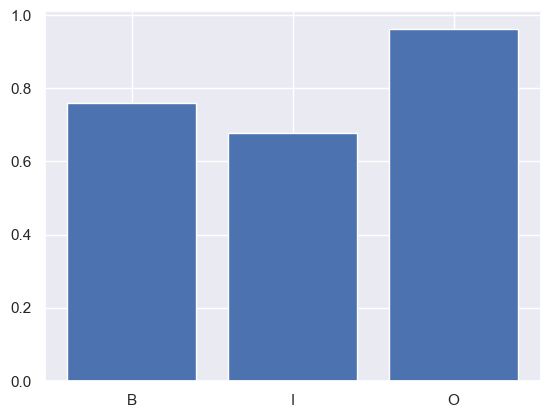

In [48]:
plt.bar(range(len(results['class_wise_f1:'])),results['class_wise_f1:'].values())
plt.xticks(range(len(results['class_wise_f1:'])), results['class_wise_f1:'].keys())
plt.show()

# Task 2 GRU (Model 3) Word2Vec

In [49]:
test_loader, test_set = get_data(2,'word2vec')
model = load_model(2,3,test_set.embedding,'word2vec')
results = evaluate(model, test_loader, torch.nn.NLLLoss(), CRF=False)

Test Loss: 0.05120
Accuracy: 0.92729, Precision: 0.86567, Recall: 0.68194, F1-Score: 0.74632


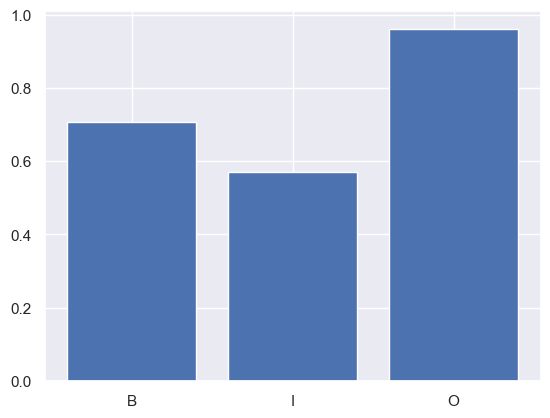

In [50]:
plt.bar(range(len(results['class_wise_f1:'])),results['class_wise_f1:'].values())
plt.xticks(range(len(results['class_wise_f1:'])), results['class_wise_f1:'].keys())
plt.show()

# Task 2 GRU (Model 3) Glove

In [51]:
test_loader, test_set = get_data(2,'glove')
model = load_model(2,3,test_set.embedding,'glove')
results = evaluate(model, test_loader, torch.nn.NLLLoss(), CRF=False)

Test Loss: 0.05895
Accuracy: 0.91138, Precision: 0.84403, Recall: 0.61987, F1-Score: 0.69398


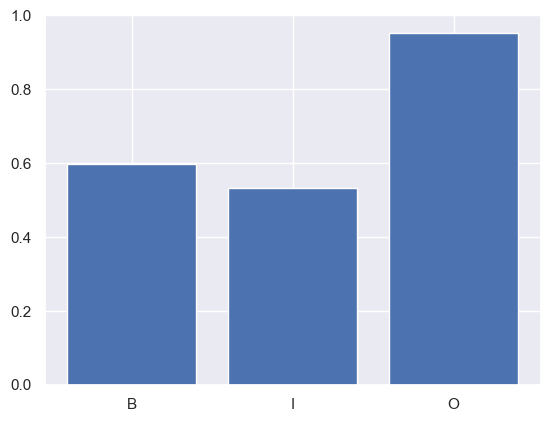

In [52]:
plt.bar(range(len(results['class_wise_f1:'])),results['class_wise_f1:'].values())
plt.xticks(range(len(results['class_wise_f1:'])), results['class_wise_f1:'].keys())
plt.show()

# Task 2 GRU (Model 3) FastText

In [53]:
test_loader, test_set = get_data(2,'fasttext')
model = load_model(2,3,test_set.embedding,'fasttext')
results = evaluate(model, test_loader, torch.nn.NLLLoss(), CRF=False)

Test Loss: 0.04455
Accuracy: 0.93074, Precision: 0.81325, Recall: 0.77371, F1-Score: 0.79184


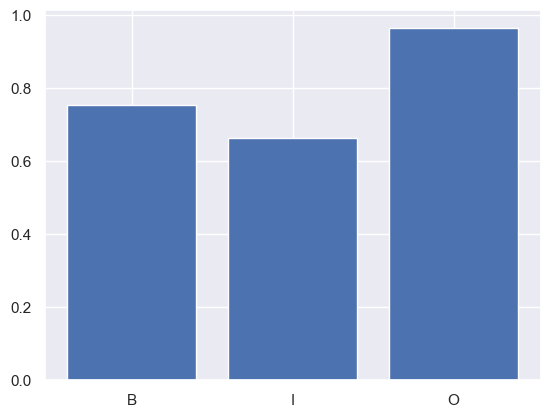

In [54]:
plt.bar(range(len(results['class_wise_f1:'])),results['class_wise_f1:'].values())
plt.xticks(range(len(results['class_wise_f1:'])), results['class_wise_f1:'].keys())
plt.show()